Sejam bem-vindos ao meu projeto de portfólio de negócio da empresa fictícia Northwest Real Estate Agency.

1. O Problema do Negócio

Nesse projeto de negócio irei analisar um banco de dados real. Este banco de dados público, foi  disponibilizado pelo website de competições de Data Science, o Kaggle.
A empresa Northwest Real Estate Agency tem como objetivo realizar a compra e venda de imóveis na cidade de Seattle. Para isso a empresa necessita de uma análise precisa de todas as informações e assim poder obter o lucro desejado na compra e venda de imóveis.


### Importação de bibliotecas

In [1]:
# Bibliotecas importadas
import numpy          as np
import pandas         as pd
import streamlit      as st
import seaborn        as sns

from IPython.display  import HTML
from datetime         import datetime

### Funções para otimização

In [2]:
# Funções para otimização
def jupyter_settings():
    #%matplotlib inline
    #%pylab inline
    #plt.style.use( 'bmh' )
    #plt.rcParams['figure.figsize'] = [ 6, 12]
    #plt.rcParams['font.size'] = 24
    display( HTML( '') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = 30
    pd.set_option('display.float_format', '{:.2f}'.format)
    pd.set_option( 'display.expand_frame_repr', False )
    sns.set_theme(rc={'figure.figsize': (10, 5)})
    
jupyter_settings()

# Carregamento dos dados
def get_data(data):
    data = pd.read_csv(path)
    return data

# Conversão da coluna 'date' para o formato de data padrão
def set_date(data):
    data['date'] = pd.to_datetime(data['date'], format=('%Y-%m-%d'))
    return data

# Estatística Descritiva
def statistcs(data):
    num_attributes = data.select_dtypes(include=['int64', 'float64'])
    # Tendencia Central - Media e Median
    ct1 = pd.DataFrame(num_attributes.apply(np.mean)).T
    ct2 = pd.DataFrame(num_attributes.apply(np.median)).T
    # Despersão - Desvio Padrão, Mínimo, Máximo, Range, Skew, Kurtosis
    d1 = pd.DataFrame(num_attributes.apply(np.std)).T
    d2 = pd.DataFrame(num_attributes.apply(min)).T
    d3 = pd.DataFrame(num_attributes.apply(max)).T
    d4 = pd.DataFrame(num_attributes.apply(lambda x: x.max() - x.min())).T
    d5 = pd.DataFrame(num_attributes.apply(lambda x: x.skew())).T
    d6 = pd.DataFrame(num_attributes.apply(lambda x: x.kurtosis())).T

    m = pd.concat([d2, d3, d4,ct1, ct2, d1, d5, d6]).T.reset_index()

    m.columns = ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis']
    print(m)
    return data

### Extração e carregamento


In [3]:
# Extração e carregamento da base de dados
path = 'csv_files/kc_house_data.csv'
data = get_data(path)

### Denominação dos conteúdos das colunas


In [4]:
# Conferência do tipo de dado das colunas
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

Atributos   Definição

id  -  Identificação única para cada imóvel

date  -  Data da venda do imóvel

price  -  Preço que o imóvel foi vendido

bedrooms  - Número de quartos

bathrooms  - Número de banheiros

sqft_living -  Tamanho (em pés quadrado) do espaço interior (área construída)

sqft_lot  - Tamanho (em pés quadrado) do terreno onde o imóvel está situado

sqft_basement - Tamanho (em pés quadrado) do espaço interior que se encontra abaixo do nível do solo

sqft_above  - Tamanho (em pés quadrado) do espaço interior que se encontra acima do nível do solo.

floors  -  Número de pisos do imóvel

waterfront  - Indica a presença ou não de vista para água

view   - Um índice de 0 a 4 de quão boa é a visão do imóvel

condition -  Um índice de 1 a 5 que indica a condição do imóvel

grade  -  Um índice de 1 a 13 que indica a qualidade da construção e o design do imóvel.

yr_built  -  Ano de construção do imóvel

yr_renovated -  Ano de reforma do imóvel

zipcode  - Código Postal do logradouro do imóvel

lat   - Latitude

long   - Longitude

sqft_livining15 - Tamanho (em pés quadrado) do espaço interno de habitação para os 15 vizinhos mais próximo

sqft_lot15 - Tamanho (em pés quadrado) dos terrenos dos 15 vizinhos mais próximo

### Análise dos tipos de dados das colunas

In [5]:
# Checagem dos valores
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00
mean,4580301520.86,540088.14,3.37,2.11,2079.90,15106.97,1.49,0.01,0.23,3.41,7.66,1788.39,291.51,1971.01,84.40,98077.94,47.56,-122.21,1986.55,12768.46
std,2876565571.31,367127.20,0.93,0.77,918.44,41420.51,0.54,0.09,0.77,0.65,1.18,828.09,442.58,29.37,401.68,53.51,0.14,0.14,685.39,27304.18
min,1000102.00,75000.00,0.00,0.00,290.00,520.00,1.00,0.00,0.00,1.00,1.00,290.00,0.00,1900.00,0.00,98001.00,47.16,-122.52,399.00,651.00
25%,2123049194.00,321950.00,3.00,1.75,1427.00,5040.00,1.00,0.00,0.00,3.00,7.00,1190.00,0.00,1951.00,0.00,98033.00,47.47,-122.33,1490.00,5100.00
50%,3904930410.00,450000.00,3.00,2.25,1910.00,7618.00,1.50,0.00,0.00,3.00,7.00,1560.00,0.00,1975.00,0.00,98065.00,47.57,-122.23,1840.00,7620.00
75%,7308900445.00,645000.00,4.00,2.50,2550.00,10688.00,2.00,0.00,0.00,4.00,8.00,2210.00,560.00,1997.00,0.00,98118.00,47.68,-122.12,2360.00,10083.00
max,9900000190.00,7700000.00,33.00,8.00,13540.00,1651359.00,3.50,1.00,4.00,5.00,13.00,9410.00,4820.00,2015.00,2015.00,98199.00,47.78,-121.31,6210.00,871200.00


### Limpeza e conferência da base de dados

In [6]:
# Conferência de dados faltantes
data.isnull().sum()

# Checagem e confirmação de imóveis duplicados
data.loc[data['id'].duplicated()]

# Confirmação de que o mesmo imóvel foi vendido em 2014-09-16 e no ano seguinte foi vendido novamente, na data de 2015-04-22.
data.loc[data['id'] == 1000102]

# Separação e comparação dos valores venais da primeira e da segunda venda do mesmo imóvel
data_dup = data['id'].duplicated()
data_dup1 = data.loc[data_dup, 'id'].tolist()

# Exportação da lista de duplicados para uma planilha csv.
data.loc[data['id'].isin(data_dup1), :].to_csv(r'export/duplicated.csv')

# Checagem do imóvel da base de dados que possui 33 quartos
data['bedrooms'].sort_values().unique()

# Numa rápida comparação com outros imóveis, selecionei as colunas de preço, quantidade de banheiros e área construída.
# Portanto é válido afirmar que os 33 quartos é de fato um erro de digitação.
# Sendo assim o valor será acertado para 3, que é a média dos seus respectivos similares.
print(data.loc[data['bedrooms'] == 33][['id', 'price', 'bathrooms', 'sqft_living', 'bedrooms']])

check1 = data['price'].isin(range(600000, 700000))
check2 = data['bathrooms'].isin(range(1, 5))
check3 = data['sqft_living'].isin(range(1600, 1700))
data.loc[check1 & check2 & check3, ['bedrooms']].mean()

# Execução da correção
data.loc[data['bedrooms'] == 33, 'bedrooms'] = 3
data['bedrooms'].sort_values().unique()

# Checagem do imóveis cadastrados com 0 quartos
data.loc[data['bedrooms'] == 0][['id', 'price', 'bathrooms', 'sqft_living', 'sqft_lot', 'bedrooms']]
data.loc[data['bedrooms'] == 0].nunique()

# Premissa, deve-se assumir que estes imóveis estão cadastrados corretamente e não devem ser imóveis do tipo residencial e sim cômodos comerciais.
data['bathrooms'].sort_values().unique()
data.loc[data['bathrooms'] == 0].sort_values('price')

# Premissa, deve-se assumir que estes imóveis estão cadastrados corretamente e não devem ser imóveis do tipo residencial.

# Checagem OK, sem valores 'outlier'
data['sqft_living'].sort_values().unique()

# Checagem OK, sem valores 'outlier'
data['sqft_lot'].sort_values().unique()

# Checagem OK, sem valores 'outlier'
data['sqft_above'].sort_values().unique()

# Checagem OK, sem valores 'outlier'
data['sqft_basement'].sort_values().unique()

# Aqui pode-se aferir que 60% dos imóveis do banco de dados não possuem porão. Daí o valor 0 no tamanho
data.loc[data['sqft_basement'] == 0, 'id'].nunique() / data.loc[:, 'id'].nunique()

# Checagem OK, sem valores 'outlier'
data['yr_built'].sort_values().unique()

# Checagem OK, sem valores 'outlier'
data['yr_renovated'].sort_values().unique()
data['yr_renovated'].value_counts()

# A quantidade de imóveis reformados no banco de dados é bem pequena. São 4,3% do total, aproximadamente.
20699 / 21613
data

               id     price  bathrooms  sqft_living  bedrooms
15870  2402100895 640000.00       1.75         1620        33


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.00,3,1.00,1180,5650,1.00,0,0,3,7,1180,0,1955,0,98178,47.51,-122.26,1340,5650
1,6414100192,20141209T000000,538000.00,3,2.25,2570,7242,2.00,0,0,3,7,2170,400,1951,1991,98125,47.72,-122.32,1690,7639
2,5631500400,20150225T000000,180000.00,2,1.00,770,10000,1.00,0,0,3,6,770,0,1933,0,98028,47.74,-122.23,2720,8062
3,2487200875,20141209T000000,604000.00,4,3.00,1960,5000,1.00,0,0,5,7,1050,910,1965,0,98136,47.52,-122.39,1360,5000
4,1954400510,20150218T000000,510000.00,3,2.00,1680,8080,1.00,0,0,3,8,1680,0,1987,0,98074,47.62,-122.05,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.00,3,2.50,1530,1131,3.00,0,0,3,8,1530,0,2009,0,98103,47.70,-122.35,1530,1509
21609,6600060120,20150223T000000,400000.00,4,2.50,2310,5813,2.00,0,0,3,8,2310,0,2014,0,98146,47.51,-122.36,1830,7200
21610,1523300141,20140623T000000,402101.00,2,0.75,1020,1350,2.00,0,0,3,7,1020,0,2009,0,98144,47.59,-122.30,1020,2007
21611,291310100,20150116T000000,400000.00,3,2.50,1600,2388,2.00,0,0,3,8,1600,0,2004,0,98027,47.53,-122.07,1410,1287


### Transformações e manipulação dos dados

In [7]:
# Alteração da coluna 'date' para o formato padrão de data (pandas date time)
set_date(data)
statistcs(data)

       attributes        min           max         range          mean        median           std  skew  kurtosis
0              id 1000102.00 9900000190.00 9899000088.00 4580301520.86 3904930410.00 2876499023.43  0.24     -1.26
1           price   75000.00    7700000.00    7625000.00     540088.14     450000.00     367118.70  4.02     34.59
2        bedrooms       0.00         11.00         11.00          3.37          3.00          0.91  0.52      1.84
3       bathrooms       0.00          8.00          8.00          2.11          2.25          0.77  0.51      1.28
4     sqft_living     290.00      13540.00      13250.00       2079.90       1910.00        918.42  1.47      5.24
5        sqft_lot     520.00    1651359.00    1650839.00      15106.97       7618.00      41419.55 13.06    285.08
6          floors       1.00          3.50          2.50          1.49          1.50          0.54  0.62     -0.48
7      waterfront       0.00          1.00          1.00          0.01          

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.00,3,1.00,1180,5650,1.00,0,0,3,7,1180,0,1955,0,98178,47.51,-122.26,1340,5650
1,6414100192,2014-12-09,538000.00,3,2.25,2570,7242,2.00,0,0,3,7,2170,400,1951,1991,98125,47.72,-122.32,1690,7639
2,5631500400,2015-02-25,180000.00,2,1.00,770,10000,1.00,0,0,3,6,770,0,1933,0,98028,47.74,-122.23,2720,8062
3,2487200875,2014-12-09,604000.00,4,3.00,1960,5000,1.00,0,0,5,7,1050,910,1965,0,98136,47.52,-122.39,1360,5000
4,1954400510,2015-02-18,510000.00,3,2.00,1680,8080,1.00,0,0,3,8,1680,0,1987,0,98074,47.62,-122.05,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,2014-05-21,360000.00,3,2.50,1530,1131,3.00,0,0,3,8,1530,0,2009,0,98103,47.70,-122.35,1530,1509
21609,6600060120,2015-02-23,400000.00,4,2.50,2310,5813,2.00,0,0,3,8,2310,0,2014,0,98146,47.51,-122.36,1830,7200
21610,1523300141,2014-06-23,402101.00,2,0.75,1020,1350,2.00,0,0,3,7,1020,0,2009,0,98144,47.59,-122.30,1020,2007
21611,291310100,2015-01-16,400000.00,3,2.50,1600,2388,2.00,0,0,3,8,1600,0,2004,0,98027,47.53,-122.07,1410,1287


In [8]:
# Alteração da coluna 'date' para o formato padrão de data (pandas date time)
set_date(data)

# Criação de novas colunas para realizar a separação da data por ano e mês
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month

# Criação da coluna de estação do ano, para efeitos de classificação de preços
# Seasons = spring, summer, autumn, and winter
data['season'] = data['month'].apply(lambda x: 'summer' if (x > 5) & (x < 8)
                                            else 'spring'if (x > 2) & (x < 5)
                                            else 'autumn' if (x > 8) & (x < 12)
                                            else 'winter')


# Conversão das colunas que estão nas medidas pé quadrado (square foot) para a medida em metro quadrado (m²)
data['living_m2'] = data['sqft_living'] / 10.764
data['lot_m2'] = data['sqft_lot'] / 10.764
data['above_m2'] = data['sqft_above'] / 10.764

# Criação de uma coluna para identificar a idade do imóvel
data['age'] = datetime.now().year - data['yr_built']

# Criação de uma coluna para anotar se o imóvel foi reformado ou não
data['renovated'] = data['yr_renovated'].apply(lambda x: 'no' if x == 0 else 'yes')

# Alteração dos valores da coluna 'waterfront' de '0' para 'No' e de 1 para 'Yes' 
data['waterfront'].replace({1: 'yes', 0: 'no'}, inplace=True)

# Criação da coluna do preço pela área construída por metro quadrado
data['price_m2'] = data['price'] / ((data['living_m2']) + (data['lot_m2']) + (data['above_m2']))

data.head(10)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,season,living_m2,lot_m2,above_m2,age,renovated,price_m2
0,7129300520,2014-10-13,221900.00,3,1.00,1180,5650,1.00,no,0,3,7,1180,0,1955,0,98178,47.51,-122.26,1340,5650,2014,10,autumn,109.62,524.90,109.62,67,no,298.19
1,6414100192,2014-12-09,538000.00,3,2.25,2570,7242,2.00,no,0,3,7,2170,400,1951,1991,98125,47.72,-122.32,1690,7639,2014,12,winter,238.76,672.80,201.60,71,yes,483.31
2,5631500400,2015-02-25,180000.00,2,1.00,770,10000,1.00,no,0,3,6,770,0,1933,0,98028,47.74,-122.23,2720,8062,2015,2,winter,71.53,929.02,71.53,89,no,167.90
3,2487200875,2014-12-09,604000.00,4,3.00,1960,5000,1.00,no,0,5,7,1050,910,1965,0,98136,47.52,-122.39,1360,5000,2014,12,winter,182.09,464.51,97.55,57,no,811.67
4,1954400510,2015-02-18,510000.00,3,2.00,1680,8080,1.00,no,0,3,8,1680,0,1987,0,98074,47.62,-122.05,1800,7503,2015,2,winter,156.08,750.65,156.08,35,no,479.86
5,7237550310,2014-05-12,1225000.00,4,4.50,5420,101930,1.00,no,0,3,11,3890,1530,2001,0,98053,47.66,-122.00,4760,101930,2014,5,winter,503.53,9469.53,361.39,21,no,118.54
6,1321400060,2014-06-27,257500.00,3,2.25,1715,6819,2.00,no,0,3,7,1715,0,1995,0,98003,47.31,-122.33,2238,6819,2014,6,summer,159.33,633.50,159.33,27,no,270.44
7,2008000270,2015-01-15,291850.00,3,1.50,1060,9711,1.00,no,0,3,7,1060,0,1963,0,98198,47.41,-122.31,1650,9711,2015,1,winter,98.48,902.17,98.48,59,no,265.53
8,2414600126,2015-04-15,229500.00,3,1.00,1780,7470,1.00,no,0,3,7,1050,730,1960,0,98146,47.51,-122.34,1780,8113,2015,4,spring,165.37,693.98,97.55,62,no,239.84
9,3793500160,2015-03-12,323000.00,3,2.50,1890,6560,2.00,no,0,3,7,1890,0,2003,0,98038,47.37,-122.03,2390,7570,2015,3,spring,175.59,609.44,175.59,19,no,336.24


### Análise Exploratória dos Dados

#### Checagem e validação de hipóteses

              price
condition          
1         334431.67
2         327287.15
3         542012.58
4         521200.39
5         612418.09


153.22402950546274

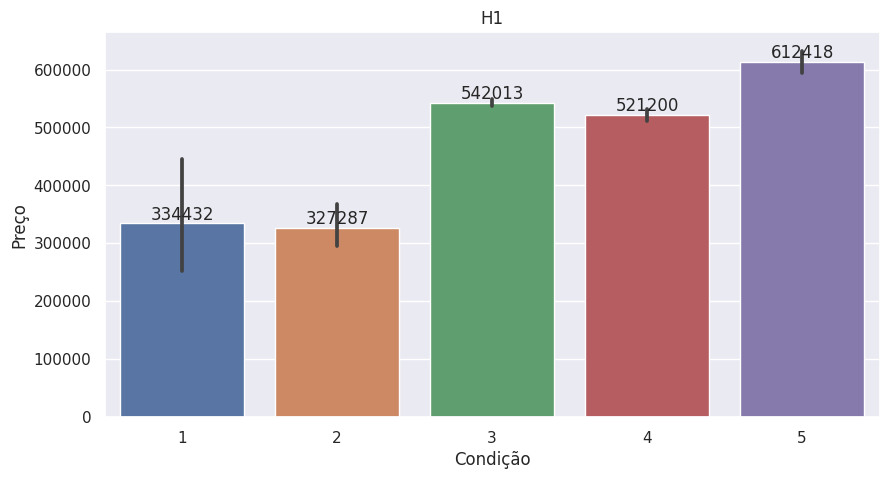

In [9]:
# H1: Imóveis com nível de condição maior ou igual a 3 são 20% mais caras, na média.
# X Falsa:
# Os imóveis da categoria 3, 4 e 5 custam 153.22% a mais na média geral
plot_1 = data[['condition', 'price']]
ax = sns.barplot(data= plot_1, x= 'condition', y= 'price')
ax.bar_label(ax.containers[0])
ax.set(xlabel= 'Condição', ylabel= 'Preço', title= 'H1');
print(data[['condition', 'price']].groupby('condition').mean())
(((542012.58 + 521200.39 + 612418.09) - (334431.67 + 327287.15)) / (334431.67 + 327287.15)) * 100

69.33897006748767


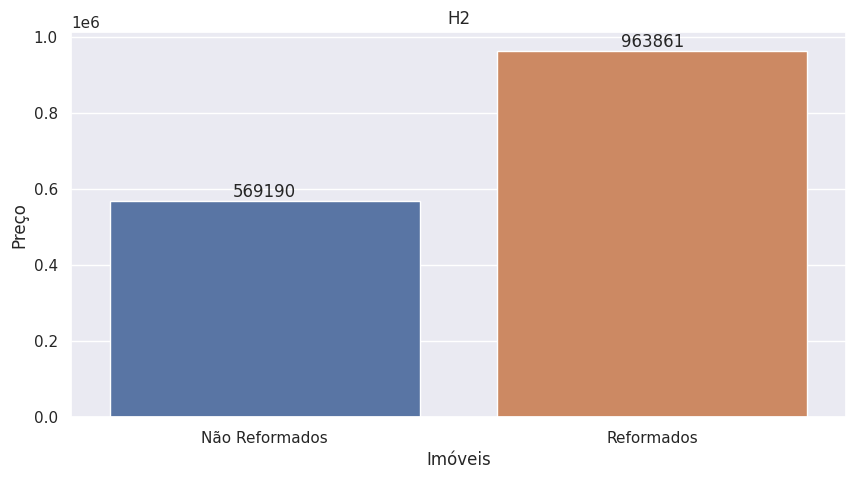

In [10]:
# H2: Imóveis com até 50 anos que foram reformados são 20% mais caros do que os não reformados, na média?
# X Falsa:
# Considerando o preço médio, ao invés de 20% mais caros, os imóveis com até 50 de idade reformados são 69.33% mais caros.

plot_2 = data.loc[(data['age'] <= 50), ['renovated', 'price', 'yr_renovated']].groupby('renovated').mean()
ax = sns.barplot( data= plot_2, x= 'yr_renovated', y= 'price' )
ax.bar_label(ax.containers[0])
ax.set(xlabel= 'Imóveis', ylabel= 'Preço', title= 'H2',
      xticklabels= ["Não Reformados", "Reformados"]);
print(((963860.67 - 569190.11) / 569190.11) * 100)

212.63916867144403

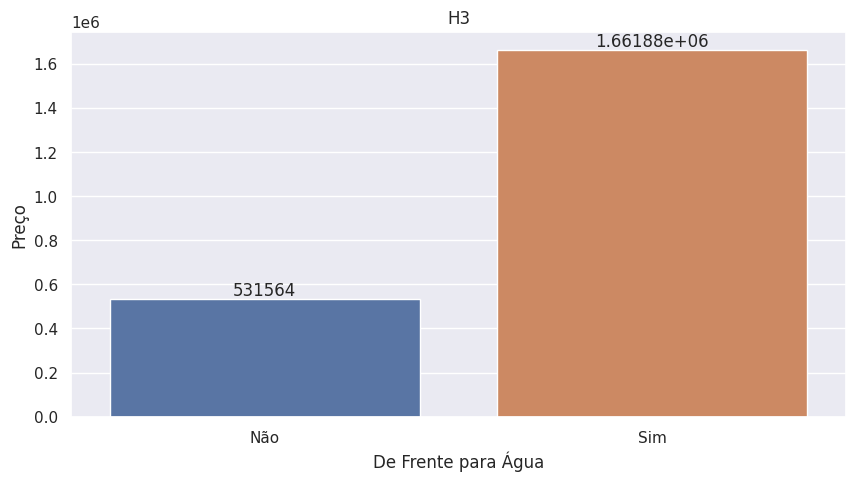

In [11]:
# H3: Imóveis que possuem vista para água, são 30% mais caros, na média.
# X Falsa:
# Considerando o preço médio, ao invés de 30%, os imóveis com vista para a água custam 212.63% a mais na média
plot_3 = data[['waterfront', 'price']].groupby('waterfront').mean().reset_index()
ax = sns.barplot( data= plot_3, x= 'waterfront', y= 'price' );
ax.bar_label(ax.containers[0])
ax.set(xlabel= 'De Frente para Água', ylabel= 'Preço', title= 'H3',
       xticklabels= ["Não", "Sim"]);
((1661876.02 - 531563.60) / 531563.60) * 100

In [12]:
# H4: Imóveis com data de construção menor que 1955, são 50% mais baratos, na média.
# X Falsa:
# Considerando o preço médio, imóveis com data de construção menor que 1955, possuem preços 1,09% mais baratos.
print(data.loc[data['yr_built'] < 1955, ['price']].mean())
print(data.loc[data['yr_built'] > 1955, ['price']].mean())
((542917.16 - 537050.91) / 537050.91) * 100

price   537050.91
dtype: float64
price   542917.16
dtype: float64


1.0923079899445658

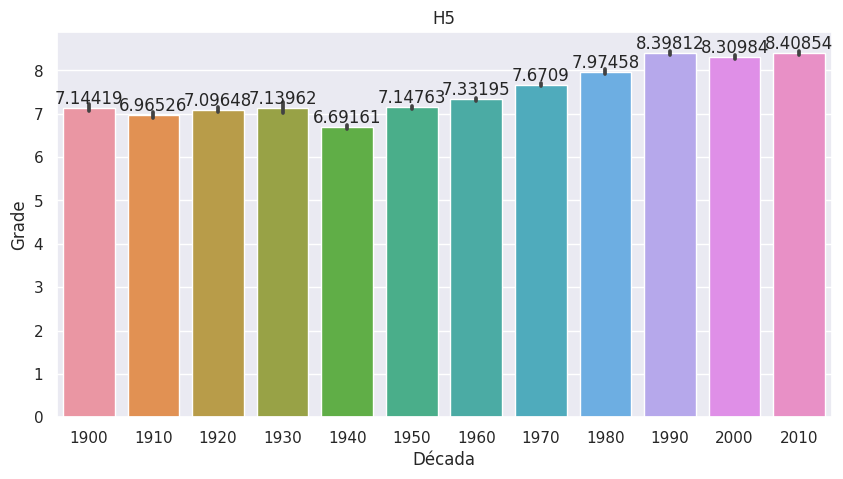

In [13]:
# H5: Os imóveis das últimas décadas são mais valiosos?
# ✔️ Verdadeira:
# A avaliação dos imóveis construídos nas últimas três décadas encontra-se em média cerca de 19% acima da avaliação dos imóveis
# construídos entre 1900 e 1959, enquanto que há um crescimento médio de 4,7% por década entre as décadas de 1940 e 1990.
df1 = data.copy()
df1['decade'] = df1['yr_built'].apply( lambda x: int((x / 10))  * 10)
df1[['decade', 'grade']].groupby('decade').mean().reset_index()
ax = sns.barplot( data= df1, x= 'decade', y= 'grade')
ax.bar_label(ax.containers[0])
ax.set(xlabel= 'Década', ylabel= 'Grade', title= 'H5');

8.13953488372093

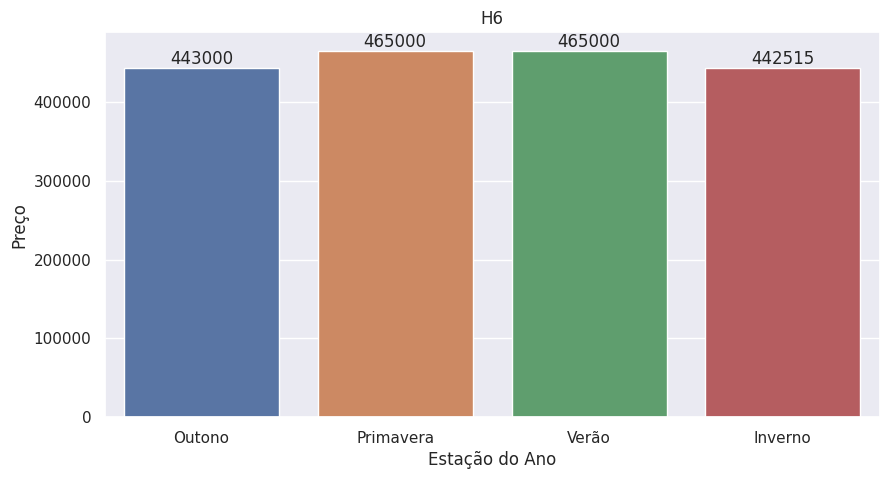

In [14]:
# # H6: O valor mediano do imóveis variam 20% de acordo com a estação do ano?
# X Falsa:
# Considerando a maior variação no preço mediano, o maio percentual de aumento encontrado foi do inverno para a primavera, onde a mediana foi 8.13% maior.
plot_6 = data[['season', 'price']].groupby('season').median().reset_index()
ax = sns.barplot(data=plot_6, x='season', y='price')
ax.bar_label(ax.containers[0])
ax.set(xlabel= 'Estação do Ano', ylabel= 'Preço', title= 'H6',
       xticklabels= ["Outono", "Primavera", "Verão", "Inverno"])
((465000 - 430000) / 430000) * 100

### Recomendações de compra

Para responder as questões de negócio, utilizou-se pensamento analítico e análise de dados.
Quais são os imóveis que a Northwest Real Estate Agency deveria comprar e por qual preço ?


Os imóveis foram agrupados por região ( zipcode ) e dentro de cada região, encontrei a mediana dos preços por área construída.
Irei sugerir a compra dos imóveis que possuem preço abaixo da mediana da região, estejam em boas condições de conservação maior ou igual a 3, que tenham um ou mais banheiros e quartos e, também, devem ter uma grade de classificação maior ou igual a 7.
Todos os imóveis que estão dentro destes filtros de compra serão separados em uma lista.
Dentro desta lista separei os dois imóveis prioritários para aquisição, já que os mesmos possuem 'Vista para a Água'.


In [15]:
df1 = data.copy()
median_price = df1[['zipcode', 'price']].groupby('zipcode').median().reset_index()
df2 = pd.merge(median_price, df1, on= 'zipcode', how= 'inner')
df2 = df2.rename(columns= {'price_y' : 'price', 'price_x' : 'median_price'})


for x in range(len(df2)):
    if ((df2.loc[x, 'price'] < df2.loc[x, 'median_price']) & (df2.loc[x, 'condition'] >= 3)
        & (df2.loc[x, 'bedrooms'] >= 1) & (df2.loc[x, 'bathrooms'] >= 1)
        & (df2.loc[x, 'grade'] >= 7)):
        df2.loc[x, 'purchase'] = 'recommended'

    else:
        df2.loc[x, 'purchase'] = 'rejected'


buy_list = df2.loc[df2['purchase'] == 'recommended']
buy_list_prior = buy_list.loc[buy_list['waterfront'] == 'yes']
print(buy_list_prior[['id','median_price', 'price', 'purchase']])
buy_list[['id', 'purchase', 'waterfront', 'condition', 'grade', 'price']].sort_values('price')
df2 = buy_list
df2

               id  median_price     price     purchase
10945   221029019     463750.00 400000.00  recommended
20079  7631800110     390000.00 380000.00  recommended


,zipcode,median_price,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month,season,living_m2,lot_m2,above_m2,age,renovated,price_m2,purchase
5,98001,260000.00,3353400435,2014-07-21,230000.00,3,2.00,1450,11204,1.00,no,0,3,7,1450,0,2003,0,47.26,-122.25,1520,9518,2014,7,summer,134.71,1040.88,134.71,19,no,175.53,recommended
6,98001,260000.00,9262800171,2015-03-24,252000.00,4,1.50,1550,19800,1.00,no,0,4,7,1050,500,1969,0,47.31,-122.27,1640,22654,2015,3,spring,144.00,1839.46,97.55,53,no,121.09,recommended
7,98001,260000.00,3353401710,2014-09-23,227950.00,3,1.50,1670,8230,1.00,no,0,5,7,1670,0,1954,0,47.26,-122.25,2077,4910,2014,9,autumn,155.15,764.59,155.15,68,no,212.07,recommended
8,98001,260000.00,8159610030,2014-07-22,196000.00,3,2.25,2070,11576,2.00,no,0,3,7,2070,0,1974,0,47.34,-122.27,1890,7519,2014,7,summer,192.31,1075.44,192.31,48,no,134.24,recommended
10,98001,260000.00,7967200060,2014-09-08,243000.00,3,1.75,1450,12125,1.00,no,0,4,7,1450,0,1981,0,47.36,-122.28,1210,12125,2014,9,autumn,134.71,1126.44,134.71,41,no,174.09,recommended
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21606,98199,689800.00,2771604196,2014-08-12,465000.00,2,1.50,1220,1120,2.50,no,0,3,8,1110,110,2008,0,47.64,-122.39,2010,3175,2014,8,winter,113.34,104.05,103.12,14,no,1450.80,recommended
21607,98199,689800.00,2770601457,2015-02-10,542300.00,3,2.25,1580,1487,3.00,no,0,3,9,1580,0,2013,0,47.65,-122.39,1600,1525,2015,2,winter,146.79,138.15,146.79,9,no,1256.15,recommended
21608,98199,689800.00,2770601912,2015-04-02,570000.00,3,3.25,1550,1280,2.00,no,0,3,9,1220,330,2013,0,47.65,-122.38,1550,1579,2015,4,spring,144.00,118.91,113.34,9,no,1514.93,recommended
21611,98199,689800.00,2770601782,2014-08-01,453000.00,3,2.50,1510,1618,2.50,no,0,3,8,1330,180,2011,0,47.65,-122.38,1350,1397,2014,8,winter,140.28,150.32,123.56,11,no,1093.78,recommended


### Recomendações de venda

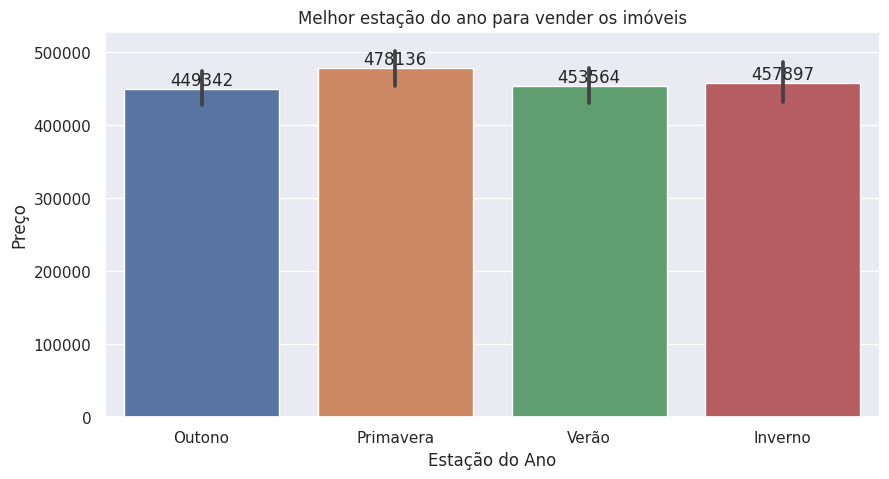

In [16]:
df3 = data.copy()
df3 = df2[df2['purchase'] == 'recommended']
df4 = df3[['season', 'zipcode', 'price']].groupby(['zipcode', 'season']).median().reset_index()
df5 = df4.rename(columns= {'price' : 'price_med_season', 'season' : 'season_med'})
df6 = pd.merge(df4, df5, on= 'zipcode', how= 'inner')

for x, row in df6.iterrows():
    if (row['price_med_season'] > row['price']):
        df6.loc[x, 'sale'] = row['price'] * 1.05

    else:
        df6.loc[x, 'sale'] = row['price'] * 1.15


ax = sns.barplot(data= df6, x= 'season', y= 'sale')
ax.bar_label(ax.containers[0])
ax.set(xlabel= 'Estação do Ano', ylabel= 'Preço', title= 'Melhor estação do ano para vender os imóveis',
       xticklabels= ["Outono", "Primavera", "Verão", "Inverno"]);

### Resultado do Negócio após a venda

In [17]:
df6['profit'] = df6['sale'] - df6['price']
print(df6['profit'].sum())
df6

52597123.89999998


,zipcode,season,price,season_med,price_med_season,sale,profit
0,98001,autumn,217500.00,autumn,217500.00,250125.00,32625.00
1,98001,autumn,217500.00,spring,227500.00,228375.00,10875.00
2,98001,autumn,217500.00,summer,209250.00,250125.00,32625.00
3,98001,autumn,217500.00,winter,225000.00,228375.00,10875.00
4,98001,spring,227500.00,autumn,217500.00,261625.00,34125.00
...,...,...,...,...,...,...,...
1115,98199,summer,575000.00,winter,571250.00,661250.00,86250.00
1116,98199,winter,571250.00,autumn,513100.00,656937.50,85687.50
1117,98199,winter,571250.00,spring,546000.00,656937.50,85687.50
1118,98199,winter,571250.00,summer,575000.00,599812.50,28562.50


### Projeção total de lucros de até $52.597.123,00 levando em consideração os melhores cenários de compra e venda, acima expostos.